### About Data 
The Ames Housing dataset was compiled by Dean De Cock for use in data science education. It's an incredible alternative for data scientists looking for a modernized and expanded version of the often cited Boston Housing dataset. 

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

[link] (https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

## Motivation

Advanced regression techniques like random forest and gradient boostin

In [1]:
#Importing libraries
import numpy as np
import pandas as pd


#Importing Libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt

#Setting Instances for visualization
sns.set()
%matplotlib inline

#importing Library for warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading Both Train and Test Files
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

#Displaying first five rows
train_data.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [4]:
#shape of Train Data
train_data.shape

(1460, 81)

There are **1460** rows and **81** columns in the **train_data**

In [5]:
test_data.shape

(1459, 80)

There are **1459** rows and **80** columns in the **test_data**

In [6]:
# train dataframe info
train_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [7]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

In [8]:
#Defining Fuction for dropping columns
def  drop_null (data):
    for column in data:
        if data[column].count() / len(data) <= 0.3:
            data.drop(column, axis=1, inplace=True)
            print('Dropped Column', column)

This fuction will eliminate all columns having more then **30%** null values.

In [9]:
#Calling function created for column having null values
#for Train dataset
drop_null(train_data)

#dropping id
train_data.drop('Id', axis=1,  inplace=True)
print(train_data.shape)

Dropped Column Alley
Dropped Column PoolQC
Dropped Column Fence
Dropped Column MiscFeature
(1460, 76)


In [10]:
#Calling function created for column having null values
#for Train dataset
drop_null(test_data)

#dropping id
test_data.drop('Id', axis=1,  inplace=True)
print(test_data.shape)

Dropped Column Alley
Dropped Column PoolQC
Dropped Column Fence
Dropped Column MiscFeature
(1459, 75)


Above column had more then **30** missing values hence are removed from the both the dataframe

In [11]:
train_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


#### Dealing with null values

Defining Categorical and Numerical columns and also defining conditions to fill null values.

In [12]:
# Removing others missing data from train data
missing_data_stats = train_data.isnull().sum()
cols = missing_data_stats[missing_data_stats>0].index.tolist()
cat_cols = train_data.select_dtypes(exclude=['int64', 'float64']).columns


for c in cols:
    if c in cat_cols:
        mode = train_data[c].mode()[0]
        train_data[c] = train_data[c].fillna(mode)
    else:
        median = train_data[c].median()
        train_data[c] = train_data[c].fillna(median)

In [13]:
# Removing others missing data from test data
missing_data_stats = test_data.isnull().sum()
cols = missing_data_stats[missing_data_stats>0].index.tolist()
cat_cols = test_data.select_dtypes(exclude=['int64', 'float64']).columns


for c in cols:
    if c in cat_cols:
        mode = test_data[c].mode()[0]
        test_data[c] = test_data[c].fillna(mode)
    else:
        median = test_data[c].median()
        test_data[c] = test_data[c].fillna(median)

In [14]:
train_data.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
                ..
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
FireplaceQu      0
GarageType       0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch   

In [15]:
test_data.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
                ..
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
FireplaceQu      0
GarageType       0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorc

In [16]:
train_data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,69.863699,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,22.027677,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Visualization

I only used train dataSet for visualization and EDA exploration.............

Above are the **Descriptive Statistics** of all the numerical values columns 

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


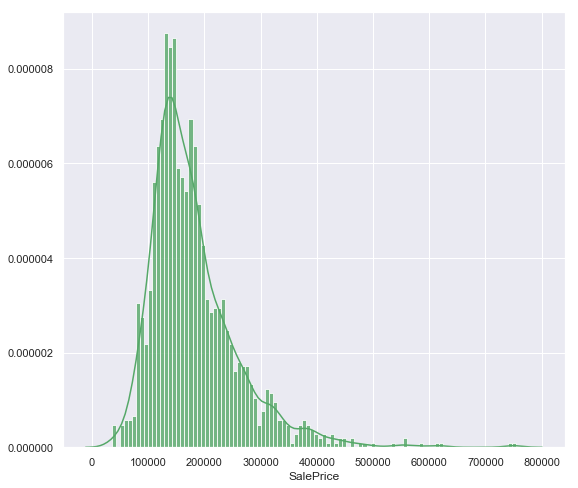

In [17]:
print(train_data['SalePrice'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(train_data['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.8});


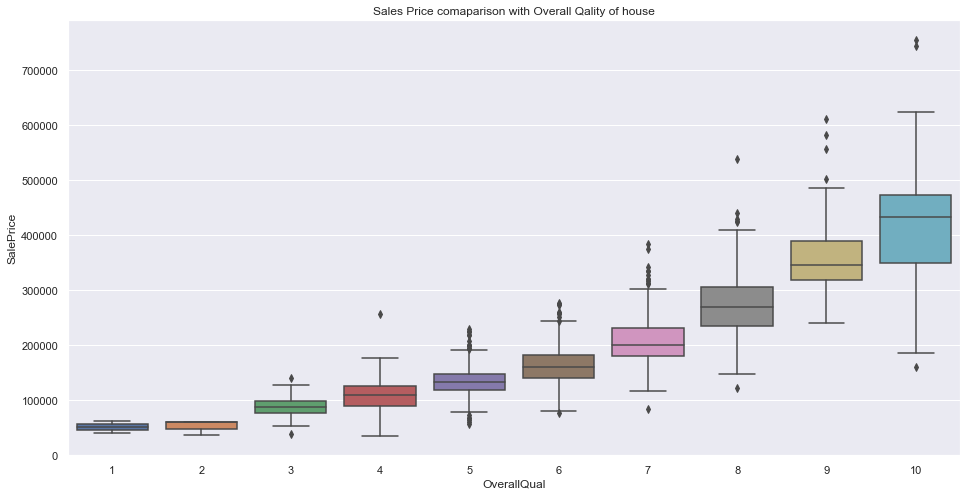

In [18]:
plt.figure(figsize=(16,8))
sns.boxplot(y='SalePrice', x='OverallQual', data=train_data)
plt.title('Sales Price comaparison with Overall Qality of house')
plt.show()

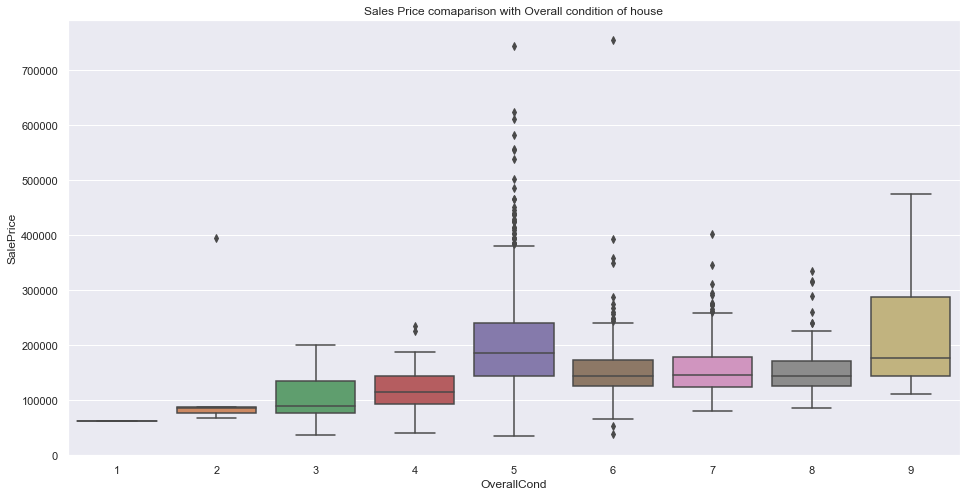

In [19]:
plt.figure(figsize=(16,8))
sns.boxplot(y='SalePrice', x='OverallCond', data=train_data)
plt.title('Sales Price comaparison with Overall condition of house')
plt.show()

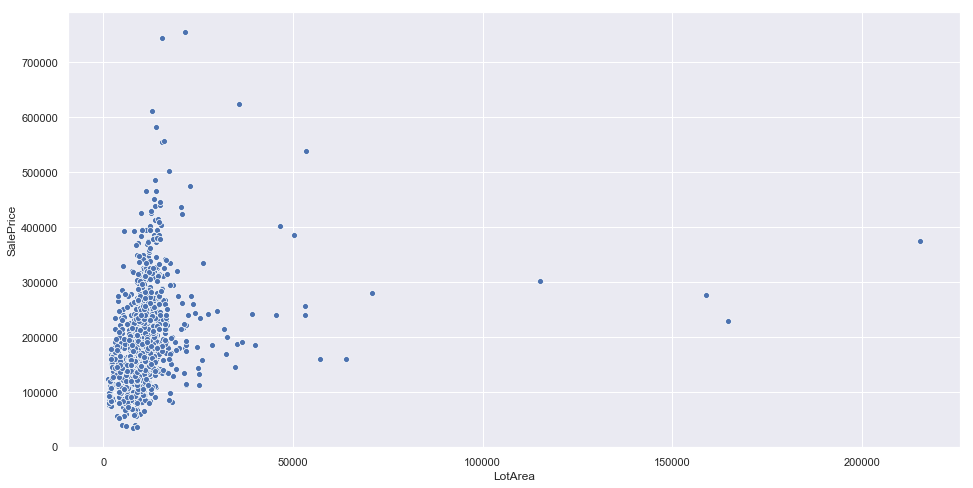

In [20]:
plt.figure(figsize=(16,8))
sns.scatterplot(y='SalePrice', x='LotArea', data=train_data)
plt.show()

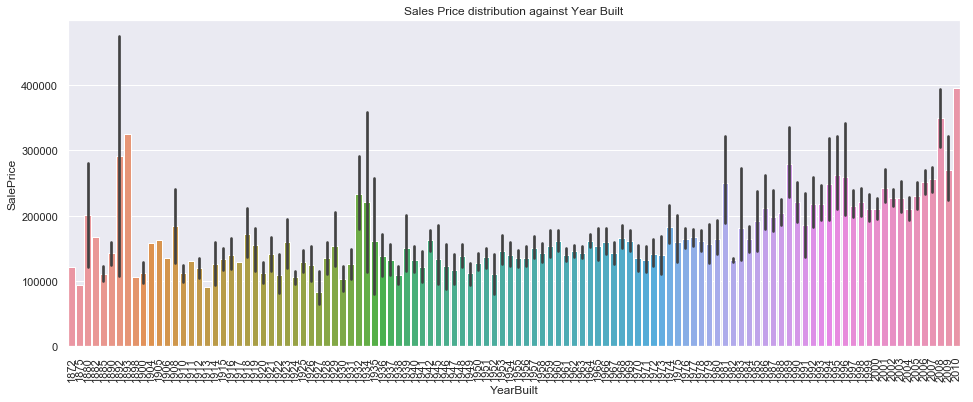

In [21]:
plt.figure(figsize=(16,6))
sns.barplot(y='SalePrice', x='YearBuilt', data=train_data)
plt.xticks(rotation=90)
plt.title('Sales Price distribution against Year Built')
plt.show()

In [22]:
#Numerical data distribution
df_num= train_data.select_dtypes(include = ['float64', 'int64'])

df_num.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


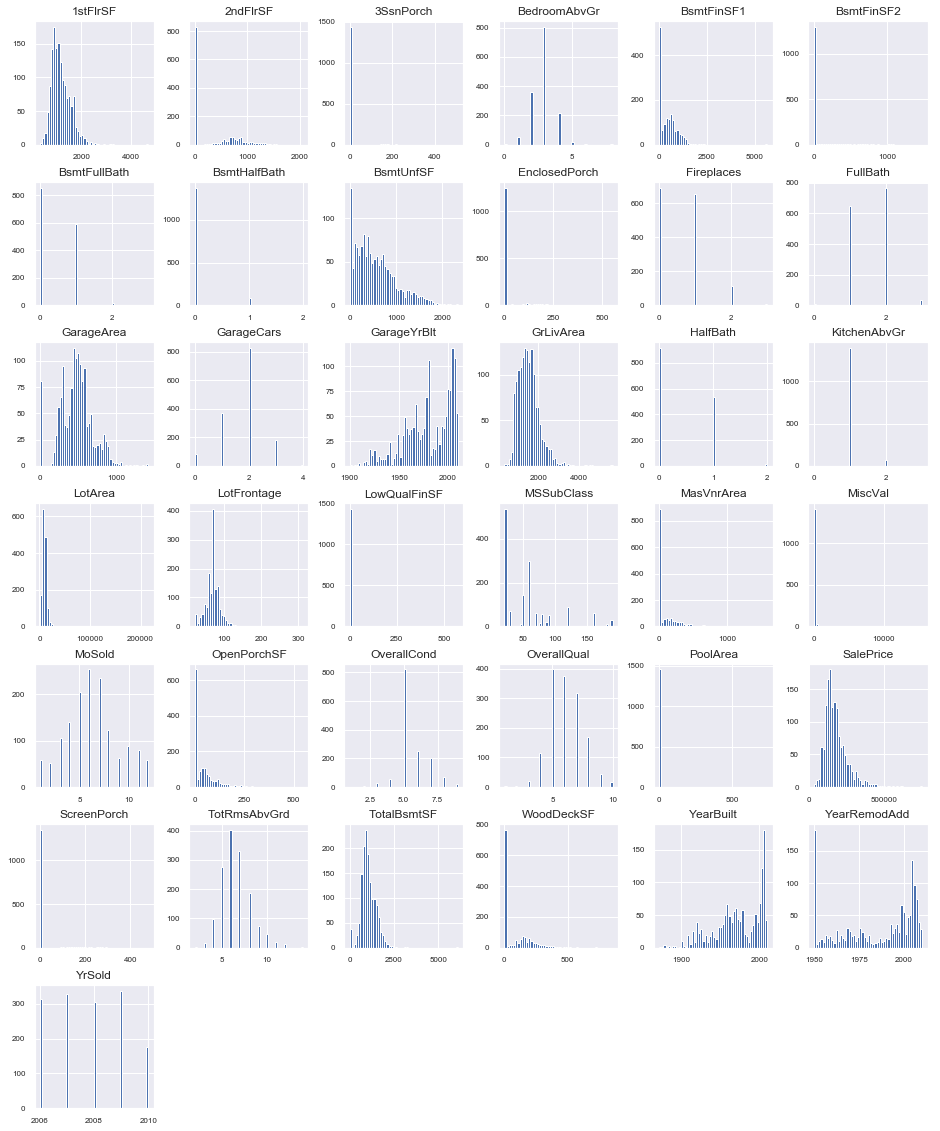

In [23]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8); 

In [24]:
df_corr = train_data.corr()

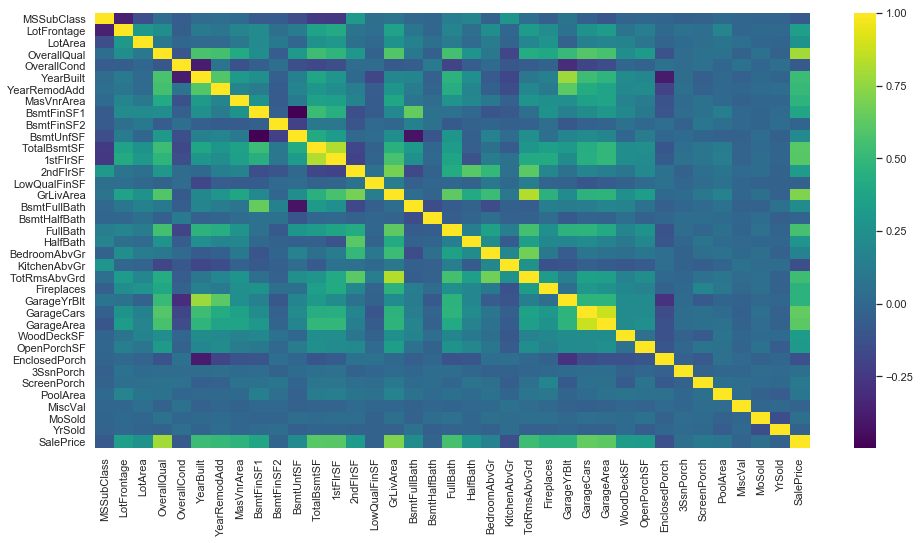

In [25]:
plt.figure(figsize=(16,8))
sns.heatmap(df_corr, cmap='viridis')
plt.show()

In [26]:
df_num_corr = df_num.corr()['SalePrice'][:-1] 
# -1 because the latest row is SalePrice
golden_features_list = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)
golden_features_list

OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64

In [27]:
import operator

individual_features_df = []
for i in range(0, len(df_num.columns) - 1): # -1 because the last column is SalePrice
    tmpDf = df_num[[df_num.columns[i], 'SalePrice']]
    tmpDf = tmpDf[tmpDf[df_num.columns[i]] != 0]
    individual_features_df.append(tmpDf)

all_correlations = {feature.columns[0]: feature.corr()['SalePrice'][0] for feature in individual_features_df}
all_correlations = sorted(all_correlations.items(), key=operator.itemgetter(1))
for (key, value) in all_correlations:
    print("{:>15}: {:>15}".format(key, value))

   KitchenAbvGr: -0.13920069217785566
       HalfBath: -0.08439171127179887
     MSSubClass: -0.08428413512659523
    OverallCond: -0.0778558940486776
         YrSold: -0.028922585168730426
   BsmtHalfBath: -0.028834567185481712
       PoolArea: -0.014091521506356928
   BsmtFullBath: 0.011439163340408634
         MoSold: 0.04643224522381936
      3SsnPorch: 0.06393243256889079
    OpenPorchSF: 0.08645298857147708
        MiscVal: 0.08896338917298924
     Fireplaces: 0.1216605842136395
      BsmtUnfSF: 0.16926100049514192
   BedroomAbvGr: 0.18093669310849045
     WoodDeckSF: 0.19370601237520677
     BsmtFinSF2: 0.19895609430836586
  EnclosedPorch: 0.2412788363011751
    ScreenPorch: 0.25543007954878405
        LotArea: 0.2638433538714063
   LowQualFinSF: 0.3000750165550133
    LotFrontage: 0.33477085313976035
     MasVnrArea: 0.4340902197568926
    GarageYrBlt: 0.4667536523633402
     BsmtFinSF1: 0.4716904265235731
   YearRemodAdd: 0.5071009671113867
      YearBuilt: 0.5228973328794967


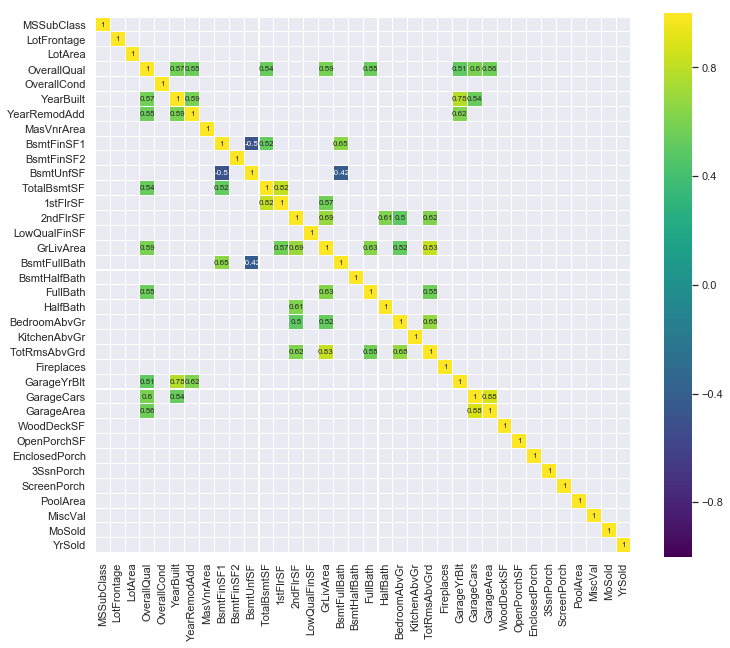

In [28]:
corr = df_num.drop('SalePrice', axis=1).corr()
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

### Encoding Data

In [29]:
#Importing Library for Encoding Data
from sklearn.preprocessing import LabelEncoder

#Defining instance for Label Encoder
encode_data = LabelEncoder()

In [30]:
# Defining Function For encoding All Categorical columns
def CaTorigical_data(data):
    for c in cat_cols:
        data[c] = encode_data.fit_transform(data[c])

In [31]:
#Applying Encoding function to train data
CaTorigical_data(train_data)

#Validating encoding
train_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,65.0,8450,1,3,3,0,4,0,...,0,0,0,0,0,2,2008,8,4,208500
1,20,3,80.0,9600,1,3,3,0,2,0,...,0,0,0,0,0,5,2007,8,4,181500
2,60,3,68.0,11250,1,0,3,0,4,0,...,0,0,0,0,0,9,2008,8,4,223500
3,70,3,60.0,9550,1,0,3,0,0,0,...,272,0,0,0,0,2,2006,8,0,140000
4,60,3,84.0,14260,1,0,3,0,2,0,...,0,0,0,0,0,12,2008,8,4,250000


In [32]:
#Applying Encoding function to test data
CaTorigical_data(test_data)

#Validating encoding
test_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,2,80.0,11622,1,3,3,0,4,0,...,0,0,0,120,0,0,6,2010,8,4
1,20,3,81.0,14267,1,0,3,0,0,0,...,36,0,0,0,0,12500,6,2010,8,4
2,60,3,74.0,13830,1,0,3,0,4,0,...,34,0,0,0,0,0,3,2010,8,4
3,60,3,78.0,9978,1,0,3,0,4,0,...,36,0,0,0,0,0,6,2010,8,4
4,120,3,43.0,5005,1,0,1,0,4,0,...,82,0,0,144,0,0,1,2010,8,4


### Appying Machine Learning Algorithm

In [33]:
# Importing Libraries 

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import r2_score


In [34]:
X= train_data.drop('SalePrice', axis=1)
ytrain = train_data['SalePrice']
x = test_data

In [35]:
# Scalling data with standard scaler
sc = StandardScaler()
X_ = sc.fit_transform(X)
x_= sc.fit_transform(x)

X = pd.DataFrame(data=X_, columns = X.columns)
x = pd.DataFrame(data=x_, columns = x.columns)
X.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0.073375,-0.045532,-0.220875,-0.207142,0.064238,0.750731,0.314667,-0.02618,0.604670,-0.225716,...,0.216503,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,0.138777,0.313867,0.208502
1,-0.872563,-0.045532,0.460320,-0.091886,0.064238,0.750731,0.314667,-0.02618,-0.628316,-0.225716,...,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,-0.614439,0.313867,0.208502
2,0.073375,-0.045532,-0.084636,0.073480,0.064238,-1.378933,0.314667,-0.02618,0.604670,-0.225716,...,-0.070361,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.990891,0.138777,0.313867,0.208502
3,0.309859,-0.045532,-0.447940,-0.096897,0.064238,-1.378933,0.314667,-0.02618,-1.861302,-0.225716,...,-0.176048,4.092524,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,-1.367655,0.313867,-3.426284
4,0.073375,-0.045532,0.641972,0.375148,0.064238,-1.378933,0.314667,-0.02618,-0.628316,-0.225716,...,0.563760,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,2.100892,0.138777,0.313867,0.208502


In [36]:
x.head() 

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,-0.874711,-1.501777,0.567330,0.363929,0.06426,0.742620,0.31870,0.0,0.572445,-0.207992,...,-0.701628,-0.360738,-0.088827,1.818960,-0.057227,-0.092244,-0.038281,1.713905,0.32475,0.201383
1,-0.874711,-0.039098,0.615963,0.897861,0.06426,-1.384637,0.31870,0.0,-1.950811,-0.207992,...,-0.178826,-0.360738,-0.088827,-0.301543,-0.057227,19.730438,-0.038281,1.713905,0.32475,0.201383
2,0.061351,-0.039098,0.275532,0.809646,0.06426,-1.384637,0.31870,0.0,0.572445,-0.207992,...,-0.207871,-0.360738,-0.088827,-0.301543,-0.057227,-0.092244,-1.140614,1.713905,0.32475,0.201383
3,0.061351,-0.039098,0.470064,0.032064,0.06426,-1.384637,0.31870,0.0,0.572445,-0.207992,...,-0.178826,-0.360738,-0.088827,-0.301543,-0.057227,-0.092244,-0.038281,1.713905,0.32475,0.201383
4,1.465443,-0.039098,-1.232092,-0.971808,0.06426,-1.384637,-2.53396,0.0,0.572445,-0.207992,...,0.489198,-0.360738,-0.088827,2.243060,-0.057227,-0.092244,-1.875504,1.713905,0.32475,0.201383


In [37]:
xtrain = X
xtest= x
print(xtrain.shape, ytrain.shape, xtest.shape)

(1460, 75) (1460,) (1459, 75)


#### Random Forrest Regressor

In [38]:
rf_regr = RandomForestRegressor(max_depth=10, random_state=0, n_estimators=100)

In [39]:
rf_regr.fit(xtrain, ytrain)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [40]:
rf_pred = rf_regr.predict(xtest)

In [41]:
rf_regr.score (xtrain, ytrain)

0.975943684219905

In [42]:
rf_sp = rf_regr.predict(xtrain)

In [43]:
r2_score(ytrain, rf_sp)

0.975943684219905

### Submission Preparation

In [44]:
sub_df = pd.DataFrame()

#### Tunning Random Forrests

In [46]:
features_tuple=list(zip(X.columns,rf_regr.feature_importances_))

In [47]:
feature_imp=pd.DataFrame(features_tuple,columns=["Feature Names","Importance"])

In [48]:
feature_imp=feature_imp.sort_values("Importance",ascending=False)

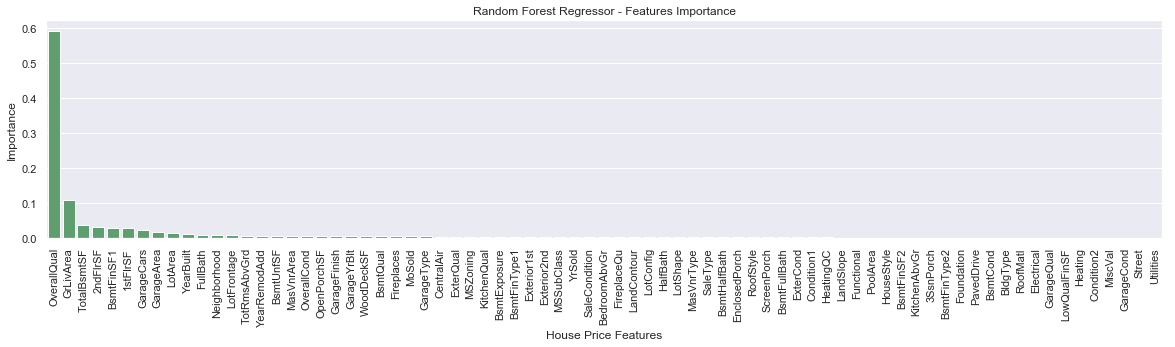

In [49]:
plt.figure(figsize=(20,4))
sns.barplot(x="Feature Names",y="Importance", data=feature_imp, color='g')
plt.xlabel("House Price Features")
plt.ylabel("Importance")
plt.xticks(rotation=90)
plt.title("Random Forest Regressor - Features Importance")
plt.show()

#### Hyperparameter Tuning using GridSearchCV

In [50]:
param_grid1 = {"n_estimators" : [9, 18, 27, 36, 45, 54, 63, 72, 81, 90],
           "max_depth" : [1, 5, 10, 15, 20, 25, 30],
           "min_samples_leaf" : [1, 2, 4, 6, 8, 10]}

RF = RandomForestRegressor(random_state=0)
# Instantiate the GridSearchCV object: logreg_cv
RF_cv1 = GridSearchCV(RF, param_grid1, cv=5,scoring='r2',n_jobs=4)

# Fit it to the data
RF_cv1.fit(xtrain,ytrain)

#RF_cv1.cv_results_, 
RF_cv1.best_params_, RF_cv1.best_score_

({'max_depth': 20, 'min_samples_leaf': 1, 'n_estimators': 54},
 0.8608520246886728)

In [51]:
param_grid2 = {"n_estimators" : [45,48,51,54,57,60,63],
           "max_depth" : [16,17,18,19,20,21,22,23,24],
           "min_samples_leaf" : [1,2,3,4]} 

RF = RandomForestRegressor(random_state=0)
# Instantiate the GridSearchCV object: logreg_cv
RF_cv2 = GridSearchCV(RF, param_grid2, cv=5,scoring='r2',n_jobs=4)

# Fit it to the data
RF_cv2.fit(xtrain,ytrain)

#RF_cv2.grid_scores_, 
RF_cv2.best_params_, RF_cv2.best_score_

({'max_depth': 17, 'min_samples_leaf': 1, 'n_estimators': 54},
 0.862145488123257)

#### Tuned Random Forrest

In [52]:
RF_tuned = RF_cv2.best_estimator_

In [53]:
RF_tuned.fit(xtrain, ytrain)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=17,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=54, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [54]:
RF_tpred = RF_tuned.predict(xtest)

In [56]:
RF_tuned.score(xtrain,ytrain)

0.9815376283213944

In [57]:
pred = RF_tuned.predict(xtrain)

In [58]:
r2_score(ytrain, pred)

0.9815376283213944

In [76]:
Sub_df = pd.DataFrame()

In [77]:
Sub_df['Id'] =range(1461, 2920) 
Sub_df['SalePrice'] = RF_tpred

In [78]:
Sub_df.to_csv('Submission.csv', index=False, header=True, columns=['Id','SalePrice'])